# Начнём с анализа данных

### Импорт базовых бибилиотек

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# read data
train_df = pd.read_csv("train_hw.csv")

In [4]:
num_train_df = train_df.select_dtypes(include=["number"])
cat_train_df = train_df.select_dtypes(include=["object", "category", "bool"])

<Axes: >

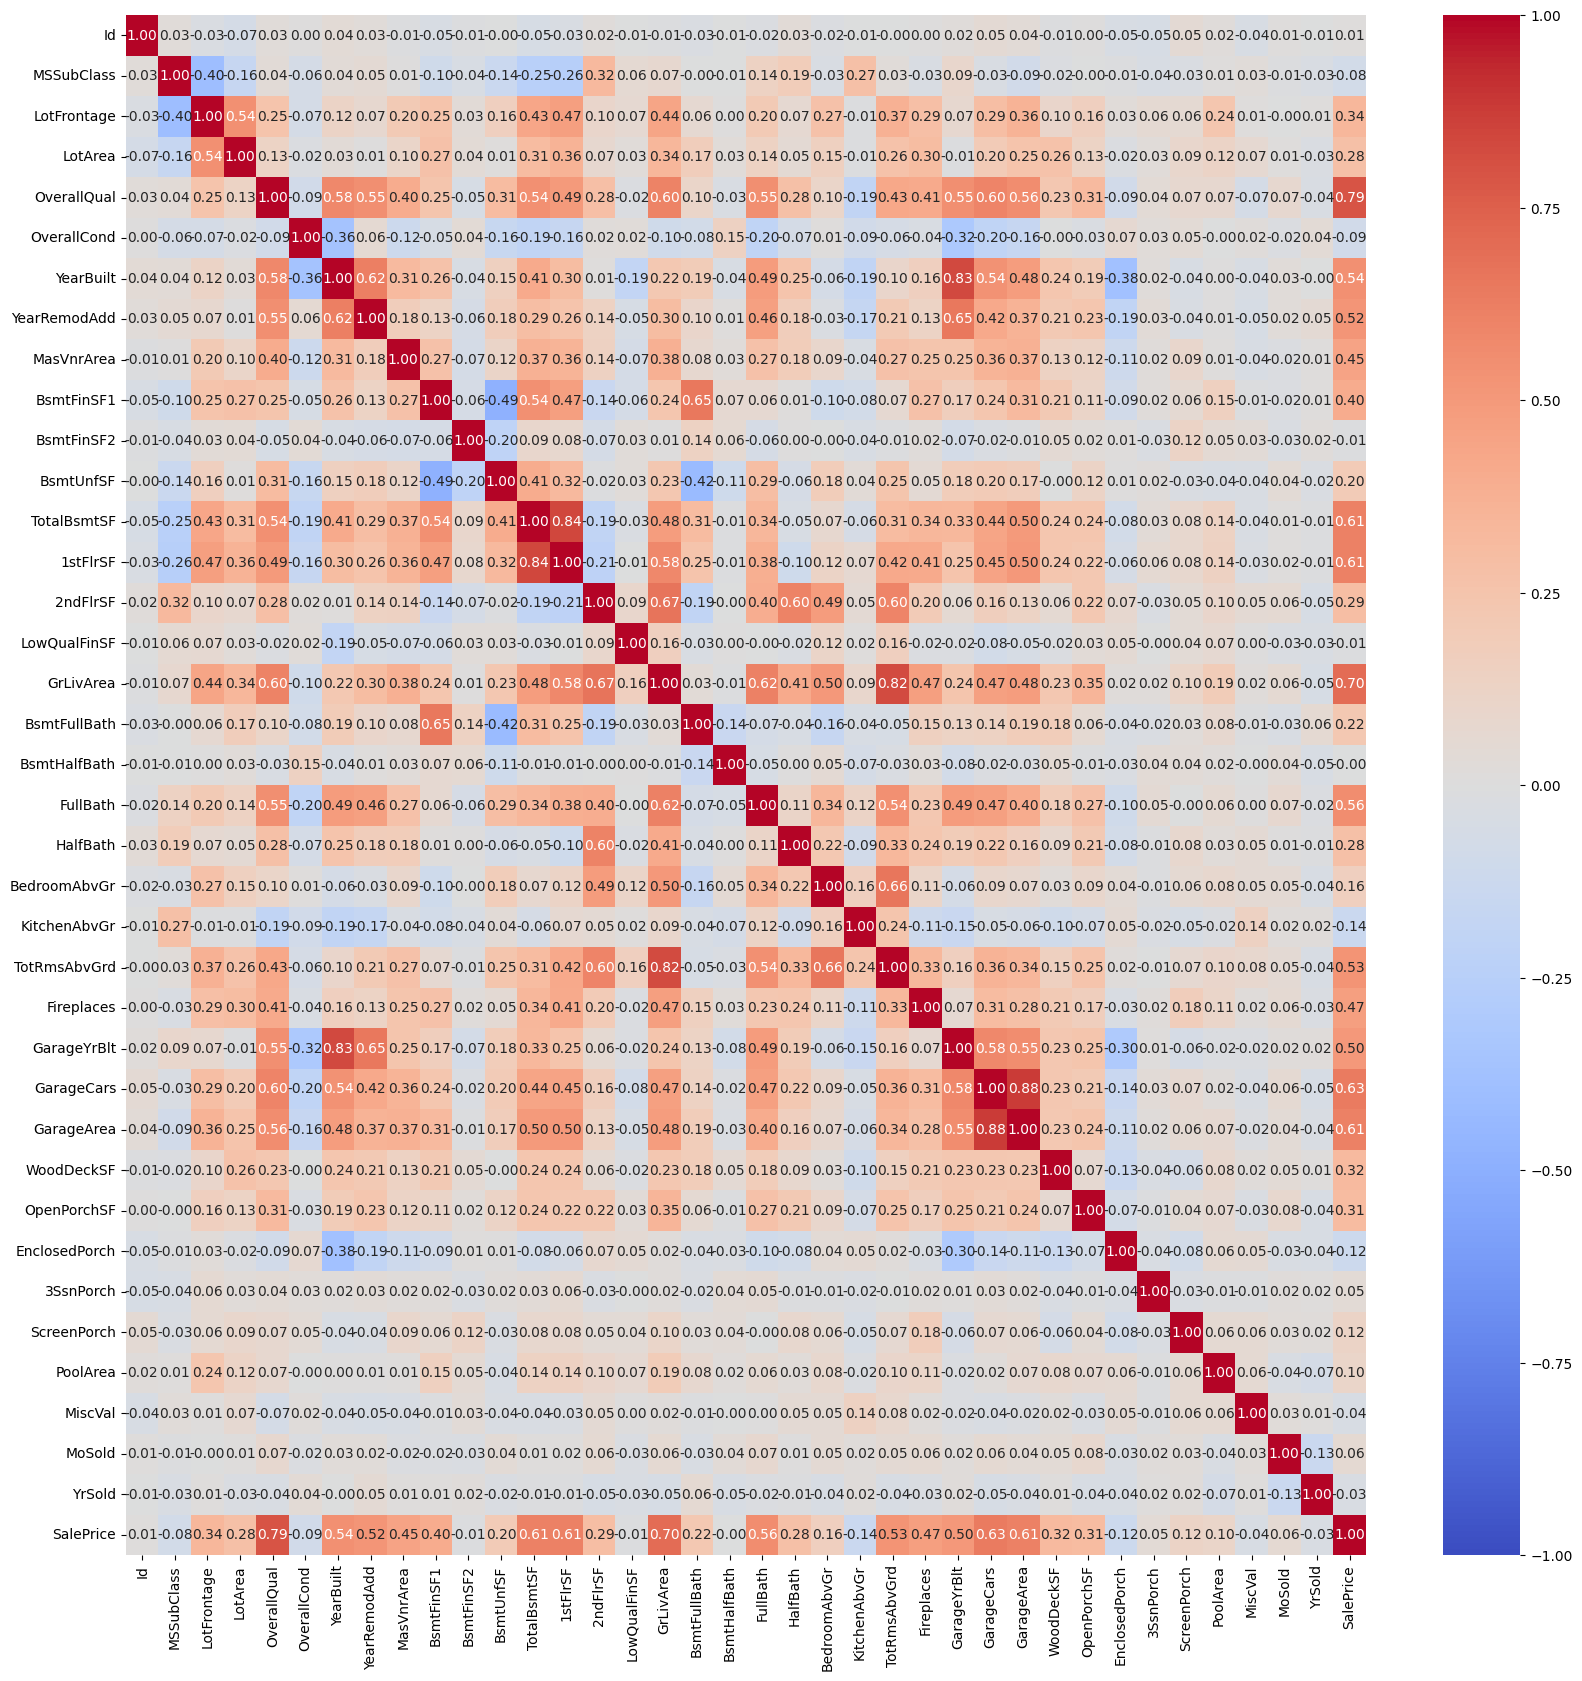

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(num_train_df.corr(), fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot=True)


In [6]:
corr = num_train_df.corr()
seen = set()

for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > 0.7 and (j, i) not in seen:
            print(f"{i} - {j}: {corr.loc[i, j]:.2f}")
            seen.add((i, j))


OverallQual - SalePrice: 0.79
YearBuilt - GarageYrBlt: 0.83
TotalBsmtSF - 1stFlrSF: 0.84
GrLivArea - TotRmsAbvGrd: 0.82
GarageCars - GarageArea: 0.88


### Вывод:
Выдим сильную кореляцию признаков. В планах удалить половину там, где кореляция больше 80%. \
Пусть будет GarageYrBlt, 1stFlrSF, GarageArea, TotRmsAbvGrd

In [7]:
numerical_columns_witn_nan = num_train_df[num_train_df.columns[num_train_df.isna().sum() > 0]].columns
print(numerical_columns_witn_nan, num_train_df[numerical_columns_witn_nan].isna().sum(), sep="\n")

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
LotFrontage    209
MasVnrArea       8
GarageYrBlt     66
dtype: int64


In [8]:
print("mean: ", num_train_df["LotFrontage"].mean())
print("median: ", num_train_df["LotFrontage"].median())

mean:  70.10636079249218
median:  70.0


### Вывод
LotFrontage очень сбаланиирован его можно заолнять хоть медианой, хоть средним. \
Однако, как мы выяснили на паре, это заспределение не совпадает в разных районах, так что как вариант можно заменять средним по районам

GarageYrBlt -- было принято решение удалить эту фичу на прошлом этапе

MasVnrArea очень мало нанов -- можно просто удалить

## Анализ категориальных переменных

In [9]:
cat_train_df.isna().sum().sort_values(ascending=False)

PoolQC           1161
MiscFeature      1125
Alley            1097
Fence             954
MasVnrType        694
FireplaceQu       547
GarageType         66
GarageCond         66
GarageQual         66
GarageFinish       66
BsmtFinType2       27
BsmtExposure       27
BsmtFinType1       26
BsmtQual           26
BsmtCond           26
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [10]:

cat_train_df[cat_train_df.columns[cat_train_df.isna().sum() / 1168 > 0.8]]

,Alley,PoolQC,Fence,MiscFeature
0,NaN,NaN,MnPrv,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1163,NaN,NaN,NaN,NaN
1164,NaN,NaN,NaN,NaN
1165,NaN,NaN,NaN,NaN
1166,NaN,NaN,NaN,NaN


In [11]:
# MasVnrType        694
# FireplaceQu       547
print(cat_train_df["MasVnrType"].mode(), cat_train_df["FireplaceQu"].mode(), sep="\n")

0    BrkFace
Name: MasVnrType, dtype: object
0    Gd
Name: FireplaceQu, dtype: object


### Вывод
**Удалим, потому что почти все занчения NaN (>80%):**

Alley	PoolQC	Fence	MiscFeature


**Заолним модой те фичи, что заполним модой:**

MasVnrType  FireplaceQu


**Фичи, которые можно удалить, ибо их мало, а так же можно просто заполнить модой:**

GarageType         66

GarageCond         66

GarageQual         66

GarageFinish       66

BsmtFinType2       27

BsmtExposure       27

BsmtFinType1       26

BsmtQual           26

BsmtCond           26

Electrical          1

## Так же стоит удалить неинформативные признаки, которые больше чем на 95% состоят из одинаковых значений

In [12]:
def find_not_informativ_cols(df: pd.DataFrame):
    not_informativ_cols = []
    for col in df.columns:
        if df[col].value_counts(normalize=True).iloc[0] > 0.95:
            not_informativ_cols.append(col)

    return not_informativ_cols

num_not_informative = find_not_informativ_cols(num_train_df)
num_not_informative

['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']

In [13]:
cat_not_informative = find_not_informativ_cols(cat_train_df)
cat_not_informative

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageCond']

## Вывод
Можно удалить столбцы: \
['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal'] \
['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageCond']

In [ ]:
out_col = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea']

fig, axes = plt.subplots(5, 8, figsize=(20, 50))
for ax, col in zip(axes.flat, num_train_df.columns):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

In [15]:
num_train_df[num_train_df["BsmtFinSF1"] > 1500]
num_train_df["BsmtFinSF1"].sort_values(ascending=False)

443     5644
559     2260
275     2188
1115    2096
543     1904
        ... 
313        0
776        0
775        0
314        0
584        0
Name: BsmtFinSF1, Length: 1168, dtype: int64

In [16]:
train_df['MSSubClass'].value_counts()

MSSubClass
20     447
60     234
50     102
120     73
30      57
160     51
70      47
80      43
90      43
190     21
85      14
75      13
45      11
180      9
40       3
Name: count, dtype: int64

## Вывод
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)

ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    train_df[col] = train_df[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    train_df[col] = train_df[col].map(fintype_map)

train_df['BsmtExposure'] = train_df['BsmtExposure'].map(expose_map)

## Тест

In [338]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class MyPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                #  num_features: pd.Series=None,
                #  cat_features: pd.Series=None,
                 fillna_numeric='median',
                 fillna_categorical='most_frequent',
                 scale_numeric=True,
                 encode_categorical=True):
        
        self.fillna_numeric = fillna_numeric
        self.fillna_categorical = fillna_categorical
        self.scale_numeric = scale_numeric
        self.encode_categorical = encode_categorical
        
        # definding maps to encode some cat features
        self.ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
        self.fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
        self.expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
        self.fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}      

        # definding list of features to delete
        # self.num_deletions = pd.Series(['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal',
        #                       'GarageYrBlt', '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'])
        # self.cat_delitions = pd.Series(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating',
        #                       'GarageCond', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])
        self.num_deletions = pd.Series([])
        self.cat_delitions = pd.Series([])
        
        self.one_hot_encoder = OneHotEncoder(sparse_output=False, min_frequency=0.3, handle_unknown="ignore")

    def fit(self, X: pd.DataFrame, y=None):
        X = X.copy()
        X['MSSubClass'] = X['MSSubClass'].astype(str)

        self.num_features = X.select_dtypes(include=["number"]).columns
        self.cat_features = X.select_dtypes(include=["object", "category", "bool"]).columns

        self.num_features = self.num_features[~self.num_features.isin(self.num_deletions)]
        self.cat_features = self.cat_features[~self.cat_features.isin(self.cat_delitions)]

        self.num_cols_with_missing = [col for col in self.num_features if X[col].isna().any()]
        self.cat_cols_with_missing = [col for col in self.cat_features if X[col].isna().any()]

        # определяем признаки, которые будут закодированы вручную (ordinal)
        self.ordinal_features = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond',
                                'HeatingQC','KitchenQual','GarageQual', 'FireplaceQu']
        self.fin_features = ['BsmtFinType1','BsmtFinType2']
        self.expose_feature = ['BsmtExposure']

        self.ohe_features = self.cat_features.drop(
            self.ordinal_features + self.fin_features + self.expose_feature, errors='ignore'
        )

        self.one_hot_encoder.fit(X[self.ohe_features].astype(str).fillna("NA"))

        return self
        
    
    def transform(self, X: pd.DataFrame):
        X_transformed: pd.DataFrame = X.copy()

        X_transformed = X_transformed.drop(columns=self.num_deletions)
        X_transformed = X_transformed.drop(columns=self.cat_delitions)

        X_transformed[self.num_cols_with_missing] = X_transformed[self.num_cols_with_missing].\
            fillna(X_transformed[self.num_cols_with_missing].mean())

        for col, upper_bound in (
            ('LotFrontage', 200),
            ('LotArea', 100000),
            ('BsmtFinSF1', 4000),
            ('TotalBsmtSF', 5000),
            ('GrLivArea', 4000),
        ):
            X_transformed[col] = X_transformed[col].clip(upper=upper_bound)


        for col in self.ordinal_features:
            if col in X_transformed.columns:
                X_transformed[col] = X_transformed[col].map(self.ordinal_map).fillna(0)
            else:
                print(col)
                
        for col in self.fin_features:
            if col in X_transformed.columns:
                X_transformed[col] = X_transformed[col].map(self.fintype_map).fillna(0)
            else:
                print(col)

        for col in self.expose_feature:
            if col in X_transformed.columns:
                X_transformed[col] = X_transformed[col].map(self.expose_map).fillna(0)
            else:
                print(col)

        ohe_df = pd.DataFrame(
            self.one_hot_encoder.transform(X_transformed[self.ohe_features].astype(str).fillna("NA")),
            columns=self.one_hot_encoder.get_feature_names_out(self.ohe_features),
            index=X_transformed.index
        )


        X_transformed = X_transformed.drop(columns=self.ohe_features)
        X_transformed = pd.concat([X_transformed, ohe_df], axis=1)
        
        return X_transformed

        

In [339]:
train_df =pd.read_csv("train_hw.csv")
test_df = pd.read_csv("test_hw.csv")

In [340]:
X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]
X_test = test_df

prep = MyPreprocessor()
prep.fit(X_train, y_train)

In [299]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

pipe = Pipeline([
    ('prep', MyPreprocessor()),
    ('model', Ridge(alpha=1.0))
])

pipe.fit(X_train, y_train)
# print("Score:", pipe.score(X_test, y_test))

Pipeline(steps=[('prep', MyPreprocessor()), ('model', Ridge())])

In [341]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('preprocessing', MyPreprocessor()),  # Используем ваш кастомный препроцессор
    # ('poly', PolynomialFeatures(degree=2, include_bias=False)),   # Создание полиномиальных признаков
    ('scaler', Normalizer()),        # Масштабируем числовые признаки
    # ('feature_selection', SelectKBest(score_func=f_regression, k=500)),   # Выбор K лучших фич
    ('model', Ridge(alpha=0.28))          # Линейная регрессия с регуляризацией L2
])

y_train = np.log1p(y_train)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', MyPreprocessor()), ('scaler', Normalizer()),
                ('model', Ridge(alpha=0.28))])

In [342]:
y_pred = pipe.predict(X_test)
y_pred = np.exp(y_pred)

In [343]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": y_pred
})

# 4. Сохраняем в файл
submission.to_csv("submission.csv", index=False)

## Попробуем подобрать параметры через кросс валидацию

ohe without reg: 
Score: 0.02104 \
Public score: 0.02435



In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Пайплайн с Ridge-регрессией
pipe = Pipeline([
    ('prep', MyPreprocessor()),  # Ваш препроцессор
    ('scaler', StandardScaler()),  # Масштабирование
    ('model', Ridge())  # Линейная регрессия с регуляризацией L2
])

# Параметры для GridSearchCV
param_grid = {
    # 'model__alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10.0, 100.0]  # Пример значений для alpha
    "model__alpha": [0.2 + x * 0.01 for x in range(20)]
}

# Настроим GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error')

# Обучаем модель с кросс-валидацией
grid_search.fit(X_train, y_train)

# Выводим лучший параметр alpha
print(f'Лучшее значение alpha: {grid_search.best_params_["model__alpha"]}')
print(f'Лучшее значение MSE: {grid_search.best_score_}')


Лучшее значение alpha: 0.28
Лучшее значение MSE: -0.00011164352626168773


# Вывод 

Самое важное, что нужно было заметить - у нас экспоненциальная зависимость (это можно сделать с помощью наших скатерплотов) => обязательно нужно отскелить логарифмом. Благодоря этому моё решение улучшилось в 2 раза. \
Так же сильно помогает регуляризация (в моём случае L2 оказалась лучше) 

А вот полиномиальные фичи показали себя с худшей стороны, не только ни улучшев модель, а наоборот захломив пространсво признаков шумом привела к ухедшению кочество предсказаний. Так же в этом случае не помогает выбор K лучших фич

Так же удаление, какзалось бы не нужных и/или не информативных фичей вело к ухудьшению качество предсказаний.. Однако это влияло сильно меньше чем полиномиальные фичи в худьшую сторону. А такие улучшения, как регуляризация и правильный скейлинг оказывают ощутимо больший эффект в положительную сторону \
Вообще, скейлинг играет ключевую роль, ибо без скейлинга ошибка вырастала в разы. А вот какой из станадартного набора скейлеров использовать в месте с отделным логарифмическим скейлингом для SalePrice разницы особой нет, все результаты на одном уровне, за исключением Normolare